# Исследование рынка заведений общественного питания Москвы

# Оглавление:

1. [Загрузим данные и изучим информацию](#load_and_explore_data)
2. [Выполним предобработку данных](#data_preprocessing)\
   2.1 [Исследуем пропуски](#explore_missing_values)\
   2.2 [Разберемся со столбцом 'seats'](#explore_seats_column)\
   2.3 [Построим график распределения количества мест](#plot_seats_distribution)\
   2.4 [Добавим столбец с наименованием улицы](#add_street_column)\
   2.5 [Добавим столбец с обозначением круглосуточных заведений](#add_24_7_column)\
   2.6 [Вывод по предобработке данных](#preprocessing_summary)
3. [Анализ данных](#data_analysis)\
   3.1 [Исследование категорий заведений](#explore_categories)\
   3.2 [Анализ количества посадочных мест в заведениях](#explore_seats)\
   3.3 [Соотношение сетевых и несетевых заведений](#explore_chain_ratio)\
   3.4 [Анализ категорий заведений на сетевых предприятиях](#explore_categories_chain)\
   3.5 [Топ-15 популярных сетей в Москве](#explore_top_chains)\
   3.6 [Обзор административных районов Москвы](#explore_districts)\
   3.7 [Распределение средних рейтингов по категориям заведений](#explore_rating_distribution)\
   3.8 [Фоновая картограмма среднего рейтинга заведений](#explore_rating_map)\
   3.9 [Отображение всех заведений на карте с помощью кластеров](#explore_map_clusters)\
   3.10 [Топ-15 улиц по количеству заведений](#explore_top_streets)\
   3.11 [Исследование улиц с единственным заведением](#explore_single_outlets)\
   3.12 [Подсчет медианы средних чеков по районам](#explore_median_prices)\
   3.13 [Вывод по анализу данных](#data_analysis_summary)
4. [Детализируем исследование: открытие кофейни](#open_coffee_shop)\
   4.1 [Количество кофеен в датасете и особенности их распределения](#explore_coffee_shops)\
   4.2 [Распределение цен за чашку кофе по районам](#explore_coffee_prices)\
   4.3 [Круглосуточные кофейни](#explore_24_7_coffee)\
   4.4 [Рейтинги кофеен и их распределение по районам](#explore_coffee_ratings)\
   4.5 [Ориентировочная стоимость чашки капучино](#explore_coffee_prices)\
   4.6 [Вывод по кофейням](#summary_coffee)\
   4.7 [Потенциальная кофейня](#potencial_coffee)
5. [ВЫВОД ИССЛЕДОВАНИЯ](#the_end)
6. [Презентация](#create_presentation)

<a id="load_and_explore_data"></a>

### Загрузим данные и изучим информацию 
Давайте загрузим данные о заведениях общественного питания Москвы из файла /datasets/moscow_places.csv и изучим общую информацию о них. Мы узнаем, сколько заведений представлено в этом датасете и что можно сказать о каждом столбце, какие значения они содержат и какого типа эти значения.

In [1]:
import pandas as pd
import math
import numpy as np
import matplotlib.pyplot as plt
from pandas.plotting import register_matplotlib_converters
import warnings
import folium
import json
from folium import Map, Choropleth
from folium import Map, Marker
from folium.plugins import MarkerCluster
from folium.features import CustomIcon
import seaborn as sns

In [2]:
data = '/datasets/moscow_places.csv'

In [3]:
places = pd.read_csv(data)

In [4]:
places

,name,category,address,district,hours,lat,lng,rating,price,avg_bill,middle_avg_bill,middle_coffee_cup,chain,seats
0,WoWфли,кафе,"Москва, улица Дыбенко, 7/1",Северный административный округ,"ежедневно, 10:00–22:00",55.878494,37.478860,5.0,NaN,NaN,NaN,NaN,0,NaN
1,Четыре комнаты,ресторан,"Москва, улица Дыбенко, 36, корп. 1",Северный административный округ,"ежедневно, 10:00–22:00",55.875801,37.484479,4.5,выше среднего,Средний счёт:1500–1600 ₽,1550.0,NaN,0,4.0
2,Хазри,кафе,"Москва, Клязьминская улица, 15",Северный административный округ,"пн-чт 11:00–02:00; пт,сб 11:00–05:00; вс 11:00...",55.889146,37.525901,4.6,средние,Средний счёт:от 1000 ₽,1000.0,NaN,0,45.0
3,Dormouse Coffee Shop,кофейня,"Москва, улица Маршала Федоренко, 12",Северный административный округ,"ежедневно, 09:00–22:00",55.881608,37.488860,5.0,NaN,Цена чашки капучино:155–185 ₽,NaN,170.0,0,NaN
4,Иль Марко,пиццерия,"Москва, Правобережная улица, 1Б",Северный административный округ,"ежедневно, 10:00–22:00",55.881166,37.449357,5.0,средние,Средний счёт:400–600 ₽,500.0,NaN,1,148.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8401,Суши Мания,кафе,"Москва, Профсоюзная улица, 56",Юго-Западный административный округ,"ежедневно, 09:00–02:00",55.670021,37.552480,4.4,NaN,NaN,NaN,NaN,0,86.0
8402,Миславнес,кафе,"Москва, Пролетарский проспект, 19, корп. 1",Южный административный округ,"ежедневно, 08:00–22:00",55.640875,37.656553,4.8,NaN,NaN,NaN,NaN,0,150.0
8403,Самовар,кафе,"Москва, Люблинская улица, 112А, стр. 1",Юго-Восточный административный округ,"ежедневно, круглосуточно",55.648859,37.743219,3.9,NaN,Средний счёт:от 150 ₽,150.0,NaN,0,150.0
8404,Чайхана Sabr,кафе,"Москва, Люблинская улица, 112А, стр. 1",Юго-Восточный административный округ,"ежедневно, круглосуточно",55.648849,37.743222,4.2,NaN,NaN,NaN,NaN,1,150.0


In [5]:
display(places.info(),places.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8406 entries, 0 to 8405
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   name               8406 non-null   object 
 1   category           8406 non-null   object 
 2   address            8406 non-null   object 
 3   district           8406 non-null   object 
 4   hours              7870 non-null   object 
 5   lat                8406 non-null   float64
 6   lng                8406 non-null   float64
 7   rating             8406 non-null   float64
 8   price              3315 non-null   object 
 9   avg_bill           3816 non-null   object 
 10  middle_avg_bill    3149 non-null   float64
 11  middle_coffee_cup  535 non-null    float64
 12  chain              8406 non-null   int64  
 13  seats              4795 non-null   float64
dtypes: float64(6), int64(1), object(7)
memory usage: 919.5+ KB


None

,lat,lng,rating,middle_avg_bill,middle_coffee_cup,chain,seats
count,8406.000000,8406.000000,8406.000000,3149.000000,535.000000,8406.000000,4795.000000
mean,55.750109,37.608570,4.229895,958.053668,174.721495,0.381275,108.421689
std,0.069658,0.098597,0.470348,1009.732845,88.951103,0.485729,122.833396
min,55.573942,37.355651,1.000000,0.000000,60.000000,0.000000,0.000000
25%,55.705155,37.538583,4.100000,375.000000,124.500000,0.000000,40.000000
50%,55.753425,37.605246,4.300000,750.000000,169.000000,0.000000,75.000000
75%,55.795041,37.664792,4.400000,1250.000000,225.000000,1.000000,140.000000
max,55.928943,37.874466,5.000000,35000.000000,1568.000000,1.000000,1288.000000


Мы видим, что в датасете у нас:
- 8406 строки, 14 столбцов
- максимальный рейтинг у заведений 5, минимальный 1
- максимальный средний счет равен 35.000
- максимальная цена за чашку кофе 1568.00
- максимальное число посадочных мест 1288 ( выглядит странно, при медианном значение в 108, видимо вброс, разберемся с этим в разделе предобаботки)

По типам данным все нормально, единственное нужно перевести стобец с посадочными местами в целочисленный формат, этим займемся в разделе предобработки данных.

In [6]:
print('Всего представлено',places['name'].nunique(),'заведений')

Всего представлено 5614 заведений


In [7]:
places['category'].unique()

array(['кафе', 'ресторан', 'кофейня', 'пиццерия', 'бар,паб',
       'быстрое питание', 'булочная', 'столовая'], dtype=object)

У нас представлены такие категории заведений как: кафе, ресторан, кофейня, пиццерия, бар,паб, быстрое питание, булочная, столовая.

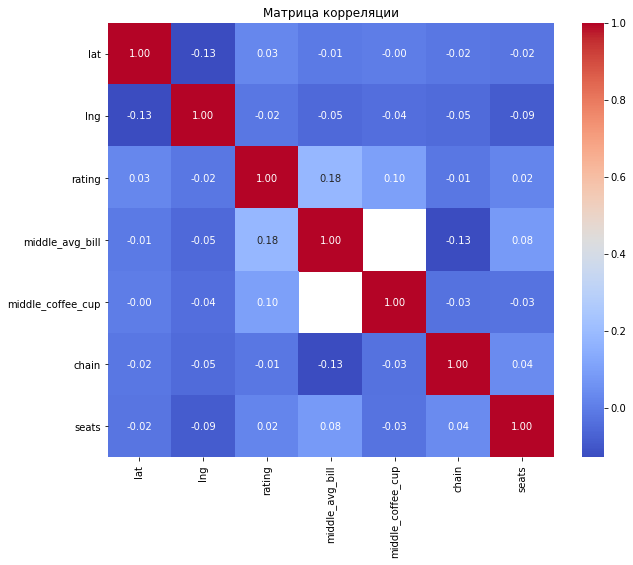

In [8]:
corr_matrix = places.corr()
plt.figure(figsize=(10,8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Матрица корреляции')
plt.show()

Мы видим, что цифры очень маленькие, это говорит нам что связь между переменными слабая или нелинейная. **Однако даже маленькая корреляция может быть статистически значимой и иметь практическую значимость.**

1) Рейтинг (rating) имеет небольшую положительную корреляцию с средним счетом (middle_avg_bill) и средней стоимостью чашки кофе (middle_coffee_cup). Это может указывать на то, что **более высокий рейтинг обычно соответствует заведениям с более высокими счетами и/или более высокой стоимостью кофе.**

2) Средняя стоимость чашки кофе (middle_coffee_cup) имеет положительную корреляцию с средним счетом (middle_avg_bill). Это может указывать на то, что в заведениях с **более высокими счетами чашка кофе, скорее всего, также будет стоить дороже.**

3) Количество посадочных мест (seats) имеет небольшую положительную корреляцию с рейтингом (rating) и средним счетом (middle_avg_bill). Это может говорить о том, что заведения с **более высоким рейтингом и/или более высоким средним счетом, как правило, предлагают больше мест для посетителей.**

4) Координаты местоположения (lat, lng) заведений слабо коррелируют с другими переменными, включенными в анализ. Это может указывать на то, **что местоположение не имеет сильного влияния на рейтинг, средний счет или количество посадочных мест.**

5) Сетевые заведения (chain) имеют небольшую отрицательную корреляцию с рейтингом (rating), средним счетом (middle_avg_bill) и средней стоимостью чашки кофе (middle_coffee_cup). Это может означать, **что сетевые заведения, как правило, имеют немного более низкие рейтинги и стоимость услуг по сравнению с несетевыми заведениями.**

                        Мы изучили информацию, теперь можем приступить к предобработке

<a id="data_preprocessing"></a>

###  Выполним предобработку данных

Прежде чем приступать к анализу, давайте проверим, есть ли дубликаты в данных, и найдем пропуски, если они есть. Если обнаружим пропуски, мы решим, как их обработать. Затем добавим столбец "street" с названиями улиц из столбца с адресом и столбец "is_24/7", чтобы отметить заведения, которые работают круглосуточно.

<a id="explore_missing_values"></a>

#### Исследуем пропуски

In [9]:
print(places.isnull().sum())

name                    0
category                0
address                 0
district                0
hours                 536
lat                     0
lng                     0
rating                  0
price                5091
avg_bill             4590
middle_avg_bill      5257
middle_coffee_cup    7871
chain                   0
seats                3611
dtype: int64


Видим много пропусков в столбцах:
- **часы работы** (видимо не получилось узнать график)
- **категория цен** (возможно не получилось узнать ценник в заведении)
- **средняя стоимость заказа в виде диапозона**
- **средняя стоимость чашки кофе**
- **средняя стоимость заказа в виде числа**
- **число посадочных мест** (видимо не все предоставляют такую информацию)

**У нас много пропусков, но мне кажется, что не разумно будет заполнять их медианными значениями, поскольку по матрице корреляции мы увидели, что между стобцами нет взаимосвязей, то есть мы не можем заполнить данные одних столбцов взяв при этом данные из других столбцов.
в любых районах города могут быть как дорогие кафе, так и дешевые, поэтому объеденять по географическому положению мы тоже не можем.**
_____________
**Единственное, что мы можем сделать, это убрать небольшую часть пропущенных значений в столбцах middle_avg_bill	middle_coffee_cup, взяв медианное значение по столбцу price, поскольку предолагается что в заведениях с высокие цены на кофе и высокий средний чек и тд.**

Остальные пропуски оставим как есть

In [10]:
medians = places.groupby('price')[['middle_avg_bill', 'middle_coffee_cup']].median()
places['middle_avg_bill'] = places['middle_avg_bill'].fillna(places['price'].map(medians['middle_avg_bill']))
places['middle_coffee_cup'] = places['middle_coffee_cup'].fillna(places['price'].map(medians['middle_coffee_cup']))

In [11]:
print(places.isnull().sum())

name                    0
category                0
address                 0
district                0
hours                 536
lat                     0
lng                     0
rating                  0
price                5091
avg_bill             4590
middle_avg_bill      4621
middle_coffee_cup    4834
chain                   0
seats                3611
dtype: int64


Процент пропусков, от которых мы избавились в каждом случае:

Для 'middle_avg_bill'≈ 12.09%

Для 'middle_coffee_cup' ≈ 38.62%

<a id="explore_seats_column"></a>

#### Теперь разберемся со столбцом 'seats', в нем есть и пропуски,и аномальные значения, и неправильный тип данных!

In [12]:
places.loc[places['seats'].isnull()]

,name,category,address,district,hours,lat,lng,rating,price,avg_bill,middle_avg_bill,middle_coffee_cup,chain,seats
0,WoWфли,кафе,"Москва, улица Дыбенко, 7/1",Северный административный округ,"ежедневно, 10:00–22:00",55.878494,37.478860,5.0,NaN,NaN,NaN,NaN,0,NaN
3,Dormouse Coffee Shop,кофейня,"Москва, улица Маршала Федоренко, 12",Северный административный округ,"ежедневно, 09:00–22:00",55.881608,37.488860,5.0,NaN,Цена чашки капучино:155–185 ₽,NaN,170.0,0,NaN
5,Sergio Pizza,пиццерия,"Москва, Ижорская улица, вл8Б",Северный административный округ,"ежедневно, 10:00–23:00",55.888010,37.509573,4.6,средние,NaN,500.0,200.0,0,NaN
11,Шашлык Шефф,кафе,"Москва, улица Маршала Федоренко, 10с1",Северный административный округ,"ежедневно, 10:00–21:00",55.881770,37.492362,4.9,NaN,NaN,NaN,NaN,0,NaN
12,Заправка,кафе,"Москва, МКАД, 80-й километр, 1",Северный административный округ,вт-сб 09:00–18:00,55.899938,37.517958,4.3,средние,Средний счёт:330 ₽,330.0,200.0,0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8387,Pab&burg,"бар,паб","Москва, улица Михайлова, 22, корп. 4",Юго-Восточный административный округ,"ежедневно, 12:00–21:30",55.726303,37.769842,4.2,средние,Цена бокала пива:от 140 ₽,500.0,200.0,0,NaN
8389,Assa,ресторан,"Москва, улица Авиаконструктора Миля, 3А",Юго-Восточный административный округ,"пн-чт 09:00–22:00; пт,сб 09:00–23:00; вс 09:00...",55.686817,37.851225,4.9,NaN,NaN,NaN,NaN,0,NaN
8392,Касабланка,кафе,"Москва, Большая Косинская улица, 27",Восточный административный округ,пн-чт 08:00–17:00; пт 08:00–16:00,55.718514,37.857576,3.3,NaN,NaN,NaN,NaN,0,NaN
8394,Намангале,кафе,"Москва, Ферганская улица, вл17-21",Юго-Восточный административный округ,"ежедневно, круглосуточно",55.705332,37.819244,4.3,NaN,NaN,NaN,NaN,0,NaN


В столбце seats есть пропуски как в сетевых, так и не в сетевых заведениях, в различных категориях, я думаю в этом случаем мы можем оставить пропуски, поменять тип данных на целочисленный, а также избавиться от выбросов, которые мы обнаружили в прошлой части.

In [13]:
places['seats'] = pd.to_numeric(places['seats'], errors='coerce').astype('Int64')

In [14]:
places['seats'].max()

1288

In [15]:
places.loc[places['seats'] == 1288]

,name,category,address,district,hours,lat,lng,rating,price,avg_bill,middle_avg_bill,middle_coffee_cup,chain,seats
6518,DelonixCafe,ресторан,"Москва, проспект Вернадского, 94, корп. 1",Западный административный округ,"ежедневно, круглосуточно",55.652577,37.475730,4.1,высокие,Средний счёт:1500–2000 ₽,1750.0,250.0,0,1288
6524,Ян Примус,ресторан,"Москва, проспект Вернадского, 121, корп. 1",Западный административный округ,"пн-чт 12:00–00:00; пт,сб 12:00–02:00; вс 12:00...",55.657166,37.481519,4.5,выше среднего,Средний счёт:1500 ₽,1500.0,203.0,1,1288
6574,Мюнгер,пиццерия,"Москва, проспект Вернадского, 97, корп. 1",Западный административный округ,"пн-пт 08:00–21:00; сб,вс 10:00–21:00",55.667505,37.491001,4.8,NaN,NaN,NaN,NaN,1,1288
6641,One Price Coffee,кофейня,"Москва, проспект Вернадского, 84, стр. 1",Западный административный округ,"ежедневно, 08:30–20:00",55.665129,37.478635,4.3,NaN,NaN,NaN,NaN,1,1288
6658,ГудБар,"бар,паб","Москва, проспект Вернадского, 97, корп. 1",Западный административный округ,"пн-пт 11:00–23:00; сб,вс 13:00–23:00",55.667327,37.490601,4.1,средние,Средний счёт:700 ₽,700.0,200.0,0,1288
6684,Пивной ресторан,"бар,паб","Москва, проспект Вернадского, 121, корп. 1",Западный административный округ,NaN,55.657133,37.481508,4.5,NaN,NaN,NaN,NaN,0,1288
6690,Японская кухня,ресторан,"Москва, проспект Вернадского, 121, корп. 1",Западный административный округ,NaN,55.657255,37.481547,4.4,NaN,NaN,NaN,NaN,1,1288
6771,Точка,кафе,"Москва, проспект Вернадского, 84, стр. 1",Западный административный округ,NaN,55.665634,37.477830,4.7,NaN,NaN,NaN,NaN,1,1288
6807,Loft-cafe академия,кафе,"Москва, проспект Вернадского, 84, стр. 1",Западный административный округ,пн-пт 09:00–20:00; сб 09:00–16:00,55.665142,37.478603,3.6,NaN,NaN,NaN,NaN,0,1288
6808,Яндекс Лавка,ресторан,"Москва, проспект Вернадского, 51, стр. 1",Западный административный округ,"ежедневно, круглосуточно",55.672580,37.507753,4.0,NaN,NaN,NaN,NaN,1,1288


Очень странно получается, все заведения с огромным числом посадочных мест находятся на одной улице и многие в одном доме.


<a id="plot_seats_distribution"></a>

#### Построим график и посмотрим на распределение количества мест


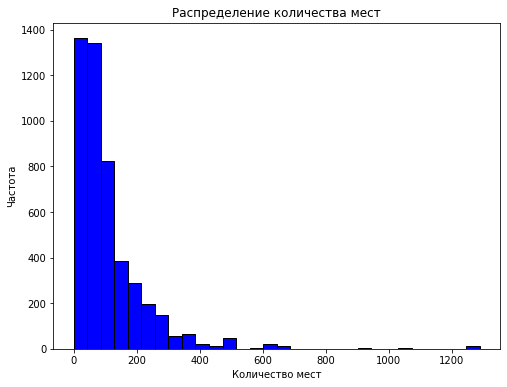

In [16]:
# Исключаем пропущенные значения перед построением гистограммы
seats_data = places['seats'].dropna()


plt.figure(figsize=(8, 6))
plt.hist(seats_data, bins=30, color='blue', edgecolor='black')
plt.xlabel('Количество мест')
plt.ylabel('Частота')
plt.title('Распределение количества мест')
plt.show()

Мы видим, что больше 500 мест имеют единичные заведения и это можно считать выбросами, но считаю неправильным заменять или удалять строки, это может повлиять на дальнейший анализ. 

<a id="add_street_column"></a>

#### Теперь нам нужно добавить столбец с наименованием улицы

In [17]:
places['street'] = places['address'].str.split(',').str[1]

<a id="add_24_7_column"></a>

#### Добавляем столбец с  с обозначением, что заведение работает ежедневно и круглосуточно (24/7)
логическое значение True — если заведение работает ежедневно и круглосуточно;\
логическое значение False — в противоположном случае.

In [18]:
places['is_24/7'] = places[places['hours'].apply(lambda x: 'ежедневно, круглосуточно' in str(x))]['hours'] == 'ежедневно, круглосуточно'
places['is_24/7'] = places['is_24/7'].fillna(False)

In [19]:
places.duplicated().sum()

0

Явных дубликатов нет, приведем названия заведений к нижнему регистру и посмотрим на неявные дубликаты

In [20]:
places['name'] = places['name'].str.lower()

In [21]:
places.duplicated(subset=['name','address','seats'], keep='first').sum()

3

Мы нашли три неявных дубликата, у которых совпадает и название, и адресс, и количество мест, эти строки мы можем удалить.

In [22]:
places = places.drop_duplicates(subset=['name','address','seats'], keep='first')

In [23]:
places.duplicated(subset=['name','address','seats'], keep='first').sum()

0

Явных дубликатов нет, а от неявных дубликатов несетевых заведений мы избавились

<a id="preprocessing_summary"></a>

#### ВЫВОД
- В данных много пропусков, но заменять их нечем и незачем, поскольку это может повлиять на результаты анализа.
Единственное, что мы можем сделать, это убрать небольшую часть пропущенных значений в столбцах middle_avg_bill middle_coffee_cup, взяв медианное значение по столбцу price, поскольку предолагается что в заведениях с высокие цены на кофе и высокий средний чек и тд.
- Так же мы добавили 2 стобца. один с названиями улиц, второй с обозначением, что заведение работает ежедневно и круглосуточно (24/7)

                                Предобработка выполнена, можем приступать к анализу

<a id="data_analysis"></a>

### Анализ данных

Теперь мы исследуем категории заведений в датасете и построим визуализации, чтобы лучше понять распределение заведений по этим категориям и количество посадочных мест в каждой из них. Также рассмотрим соотношение сетевых и несетевых заведений и выявим топ-15 популярных сетей в Москве. Мы также ответим на вопрос о том, какие категории заведений чаще являются сетевыми, и проанализируем данные на графиках.

<a id="explore_categories"></a>

#### Проведем исследование и анализ категорий заведений в данных чтобы определить наиболее распространенные типы заведений.

In [24]:
place_category = places.groupby('category')['name'].count()
place_category = place_category.sort_values(ascending=False)
print(place_category)
print('-------------------')
print('Всего заведений:',len(places))

category
кафе               2377
ресторан           2042
кофейня            1413
бар,паб             764
пиццерия            633
быстрое питание     603
столовая            315
булочная            256
Name: name, dtype: int64
-------------------
Всего заведений: 8403


Мы видим что **3 самые популярные категории заведений** это: **кафе - 2378** заведений, **ресторан - 2043** заведений и **кофейня - 1413** заведений

Построим столбчатую диаграмму

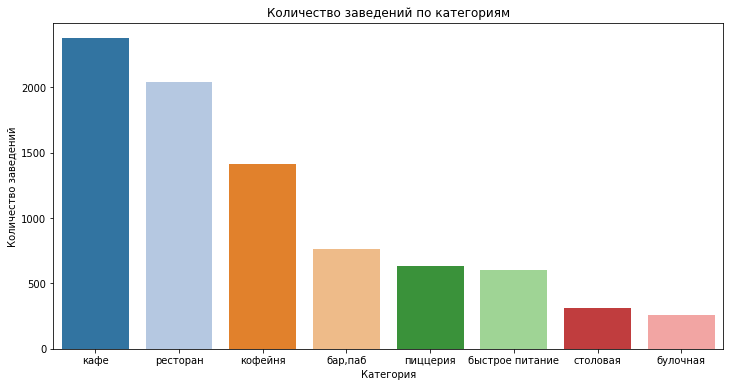

In [25]:
category_counts = places['category'].value_counts()

plt.figure(figsize=(12, 6))
sns.barplot(x=category_counts.index, y=category_counts.values, palette='tab20')
plt.xticks(rotation=90)
plt.xlabel('Категория')
plt.ylabel('Количество заведений')
plt.title('Количество заведений по категориям')
plt.xticks(rotation=0)
plt.show()

<a id="explore_seats"></a>

#### Анализируем количество посадочных мест в заведениях различных категорий


In [26]:
seats_pivot = pd.pivot_table(places, values='seats', index='category', aggfunc='median')
seats_pivot = seats_pivot.sort_values(by='seats', ascending=False).reset_index()

print(seats_pivot)

          category  seats
0         ресторан   86.0
1          бар,паб   82.0
2          кофейня   80.0
3         столовая   75.5
4  быстрое питание   65.0
5             кафе   60.0
6         пиццерия   55.0
7         булочная   50.0


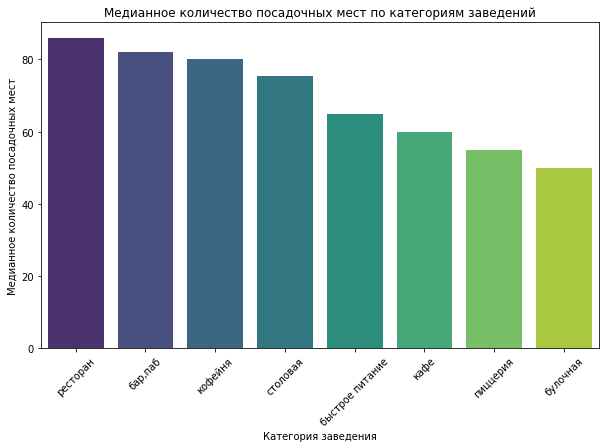

In [27]:
plt.figure(figsize=(10, 6))
sns.barplot(x=seats_pivot['category'], y=seats_pivot['seats'], palette='viridis')
plt.xlabel('Категория заведения')
plt.ylabel('Медианное количество посадочных мест')
plt.title('Медианное количество посадочных мест по категориям заведений')
plt.xticks(rotation=45)

plt.show()

<a id="explore_chain_ratio"></a>

#### Изучим соотношение сетевых и несетевых заведений в датасете, выявим преобладающий тип заведений в Москве.

Соотношение лучше всего показывает круговая диаграмма\
0 — заведение не является сетевым\
1 — заведение является сетевым

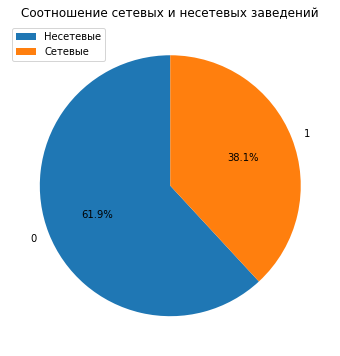

In [28]:
chain_counts = places['chain'].value_counts()

plt.figure(figsize=(8, 6))
plt.pie(chain_counts, labels=chain_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Соотношение сетевых и несетевых заведений')
plt.legend(labels=['Несетевые', 'Сетевые'], loc='best')

plt.show()

Несетевых заведений больше на 23.8%

<a id="explore_categories_chain"></a>

#### Проанализируем, какие категории заведений чаще всего являются сетевыми



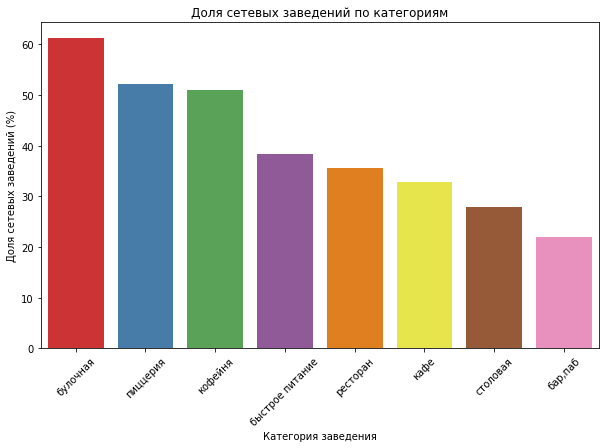

In [29]:
chain_restaurants = places[places['chain'] == 1]
category_chain_counts = chain_restaurants['category'].value_counts()


total_restaurants_by_category = places['category'].value_counts()
percentage_chain_by_category = (category_chain_counts / total_restaurants_by_category) * 100

percentage_chain_by_category = percentage_chain_by_category.sort_values(ascending=False)


plt.figure(figsize=(10, 6))
sns.barplot(x=percentage_chain_by_category.index, y=percentage_chain_by_category, palette='Set1')
plt.xlabel('Категория заведения')
plt.ylabel('Доля сетевых заведений (%)')
plt.title('Доля сетевых заведений по категориям')
plt.xticks(rotation=45)
plt.show()

Булочные, пиццерии и кофейни - чаще всего сетевые. Это вполне ожидаемый результат!

<a id="explore_top_chains"></a>

#### Выделим топ-15 популярных сетей в Москве, используя группировку данных по названиям заведений, и проанализируем, к какой категории заведений они относятся и есть ли какой-то признак, объединяющий эти сети.

In [30]:
top_15_name = chain_restaurants.groupby('name')['name'].count().sort_values(ascending=False).head(15)
print(top_15_name)

name
шоколадница                            120
домино'с пицца                          76
додо пицца                              74
one price coffee                        71
яндекс лавка                            69
cofix                                   65
prime                                   50
хинкальная                              44
кофепорт                                42
кулинарная лавка братьев караваевых     39
теремок                                 38
чайхана                                 37
cofefest                                32
буханка                                 32
му-му                                   27
Name: name, dtype: int64


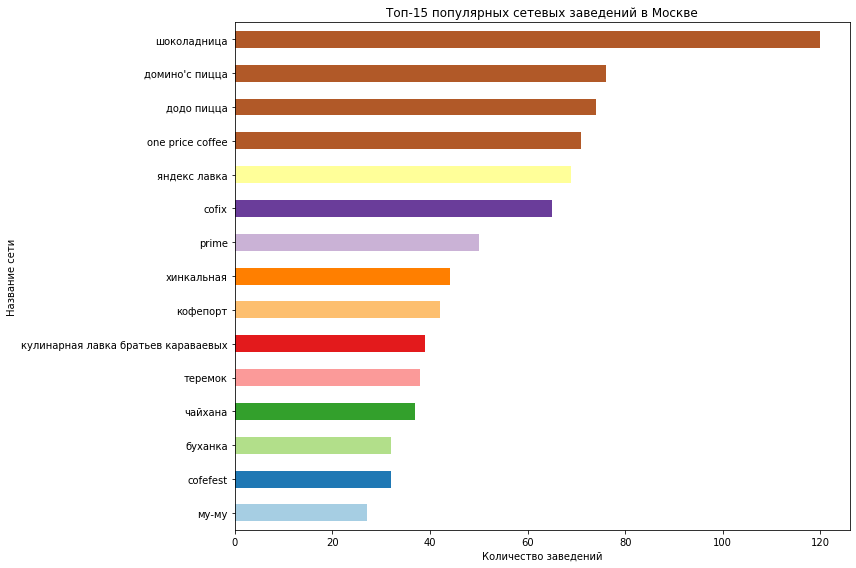

In [31]:
plt.figure(figsize=(12, 8))
colors = plt.cm.Paired(range(len(top_15_name)))
top_15_name.sort_values(ascending=True).plot(kind='barh', color=colors)
plt.xlabel('Количество заведений')
plt.ylabel('Название сети')
plt.title('Топ-15 популярных сетевых заведений в Москве')
plt.tight_layout()
plt.show()

**Шоколадница** - самая популярная сеть среди представленных, имеет 120 заведений в Москве.\
**Домино'с Пицца и Додо Пицца** - пиццерии, занимающие второе и третье места соответственно по популярности с 76 и 74 заведениями.\
**One Price Coffee, Яндекс Лавка и Cofix**- сети кофеен, которые также пользуются популярностью среди жителей Москвы.\
**Prime, Хинкальная, КОФЕПОРТ, Кулинарная лавка братьев Караваевых, Теремок, Чайхана, CofeFest, Буханка и Му-Му** - представляют разнообразные категории заведений, включая рестораны, кафе и закусочные.



In [32]:
top_15_chains = top_15_name.index.tolist()
top_15_data = places[places['name'].isin(top_15_chains)]
top_15_data

,name,category,address,district,hours,lat,lng,rating,price,avg_bill,middle_avg_bill,middle_coffee_cup,chain,seats,street,is_24/7
13,буханка,булочная,"Москва, Базовская улица, 15, корп. 1",Северный административный округ,"ежедневно, 08:00–22:00",55.877007,37.504980,4.8,NaN,NaN,NaN,NaN,1,180,Базовская улица,False
23,буханка,булочная,"Москва, Лобненская улица, 13к2",Северный административный округ,"ежедневно, 08:00–22:00",55.888421,37.527106,4.7,NaN,NaN,NaN,NaN,1,<NA>,Лобненская улица,False
32,додо пицца,пиццерия,"Москва, Коровинское шоссе, 23, корп. 1",Северный административный округ,"ежедневно, 09:00–23:00",55.877388,37.523334,4.3,NaN,Средний счёт:328 ₽,328.0,NaN,1,46,Коровинское шоссе,False
34,домино'с пицца,пиццерия,"Москва, Клязьминская улица, 11, корп. 4",Северный административный округ,"ежедневно, 10:00–23:00",55.886963,37.523518,4.2,NaN,Средний счёт:от 500 ₽,500.0,NaN,1,247,Клязьминская улица,False
46,cofefest,кофейня,"Москва, улица Маршала Федоренко, 6с1",Северный административный округ,пн-пт 09:00–19:00,55.879934,37.492522,3.6,NaN,NaN,NaN,NaN,1,<NA>,улица Маршала Федоренко,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7973,теремок,ресторан,"Москва, Ореховый бульвар, 15",Южный административный округ,"ежедневно, 10:00–22:00",55.612758,37.720272,3.7,NaN,NaN,NaN,NaN,1,0,Ореховый бульвар,False
7974,хинкальная,ресторан,"Москва, улица Генерала Белова, 23А",Южный административный округ,"ежедневно, 12:00–00:00",55.616224,37.719993,3.6,NaN,NaN,NaN,NaN,1,60,улица Генерала Белова,False
7979,яндекс лавка,ресторан,"Москва, Шипиловский проезд, 65, корп. 1",Южный административный округ,"ежедневно, 07:00–00:00",55.599020,37.714239,3.5,NaN,NaN,NaN,NaN,1,75,Шипиловский проезд,False
7980,яндекс лавка,ресторан,"Москва, улица Маршала Захарова, 2",Южный административный округ,"ежедневно, 07:00–00:00",55.624112,37.707183,4.0,NaN,NaN,NaN,NaN,1,200,улица Маршала Захарова,False


In [33]:
print("Количество заведений, работающих 24/7:", top_15_data[top_15_data['is_24/7'] == True].shape[0])
print("Количество заведений, НЕ работающих 24/7:", top_15_data[top_15_data['is_24/7'] == False].shape[0])

Количество заведений, работающих 24/7: 42
Количество заведений, НЕ работающих 24/7: 776


Всего 42 заведения из ТОП-15 работают 24 часа в сутки

**В большинсте случаев, ночью спрос на еду и кофе снижается, поэтому многие заведения не видят смысла работать в ночное время**

<a id="explore_districts"></a>

#### Определим административные районы Москвы, присутствующие в датасете, и визуализируем общее количество заведений


In [34]:
unique_districts = places['district'].unique()

print("Административные районы Москвы в датасете:")
print(unique_districts)


Административные районы Москвы в датасете:
['Северный административный округ'
 'Северо-Восточный административный округ'
 'Северо-Западный административный округ'
 'Западный административный округ' 'Центральный административный округ'
 'Восточный административный округ' 'Юго-Восточный административный округ'
 'Южный административный округ' 'Юго-Западный административный округ']


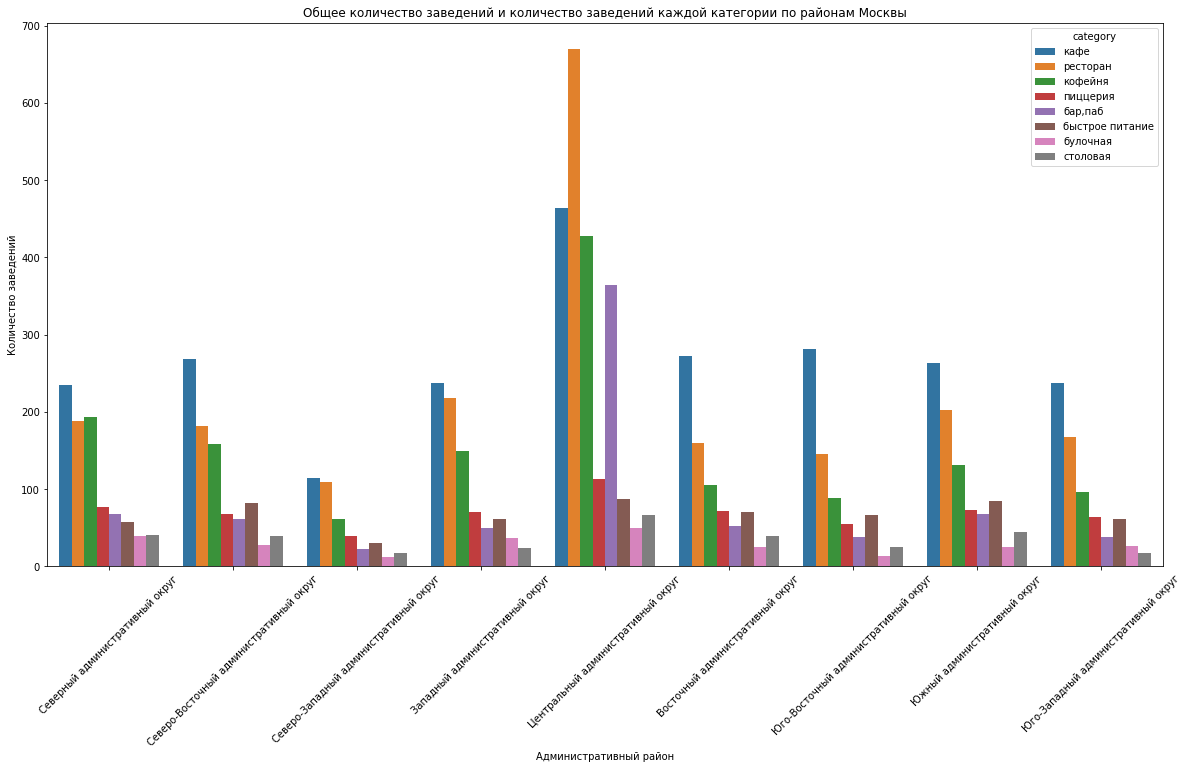

In [35]:
plt.figure(figsize=(20, 10))
sns.countplot(x='district', hue='category', data=places)
plt.xticks(rotation=45)
plt.xlabel('Административный район')
plt.ylabel('Количество заведений')
plt.title('Общее количество заведений и количество заведений каждой категории по районам Москвы')
plt.show()

В предоставленных данных можно сделать следующие наблюдения:

- **Восточный административный округ**: В этом районе больше всего заведений категории <u>"кафе" (272)</u>, что может быть связано с тем, что кафе являются популярным вариантом для проведения времени с друзьями или для быстрого перекуса.

- **Западный административный округ**: Здесь одним из самых популярных типов заведений являются <u>рестораны (218)</u>, что может быть связано с тем, что Западный округ включает в себя престижные районы с развитой культурной и деловой жизнью, где предпочитают посещать рестораны.

- **Северный административный округ**: Этот район представлен разнообразием заведений различных категорий, и здесь нет явного лидера по количеству заведений как в Центральном округе. Однако категория <u>"ресторан" </u>здесь также имеет высокое количество заведений (189).

- **Северо-Восточный административный округ**: В этом районе преобладают заведения категорий <u>"кафе" (269) и "ресторан" (182).</u>

- **Северо-Западный административный округ**: Здесь преобладают заведения <u>быстрого питания (82) и кафе (68).</u>

- **Юго-Восточный административный округ**: В этом районе часто встречаются <u>кафе (282) и заведения быстрого питания (67).</u>

- **Юго-Западный административный округ**: Категория <u>"ресторан" (168)</u> в этом районе имеет высокое количество заведений.

- **Южный административный округ**: В этом районе часто встречаются <u>кафе (264), бары/пабы (68)</u> и заведения быстрого питания (85).

<u>Общая тенденция показывает, что в **Центральном административном округе**</u> и некоторых других районах Москвы, которые имеют развитую инфраструктуру и большое количество жителей, <u>присутствует больше заведений различных категорий.</u>



<a id="explore_rating_distribution"></a>

#### Изучим распределение средних рейтингов по категориям заведений, выясним, есть ли существенные различия в усредненных рейтингах между разными типами общепита

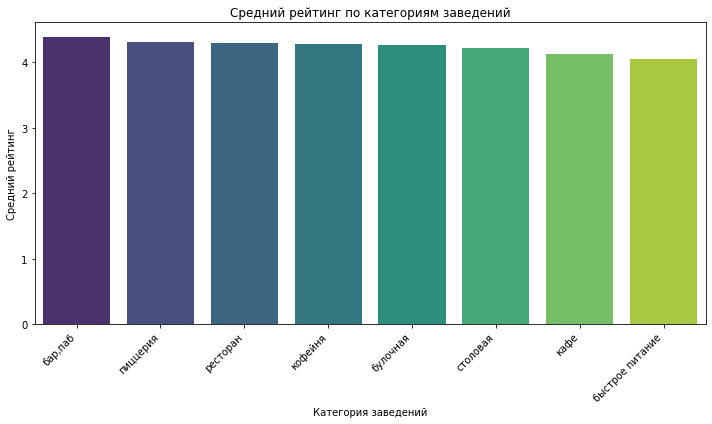

In [36]:
avg_ratings = places.groupby('category')['rating'].mean().sort_values(ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x=avg_ratings.index, y=avg_ratings.values, palette='viridis')
plt.xticks(rotation=45, ha='right')
plt.xlabel('Категория заведений')
plt.ylabel('Средний рейтинг')
plt.title('Средний рейтинг по категориям заведений')
plt.tight_layout()
plt.show()


**Бары и пабы** имеют средний рейтинг **около 4.39, что является самым высоким среди всех категорий.**

**Пиццерии и рестораны** также пользуются хорошей популярностью и имеют **высокие средние рейтинги, около 4.30 и 4.29** соответственно.

**Кофейни и булочные** имеют средний рейтинг около **4.28, что также говорит о высокой оценке посетителями.**

Средний рейтинг **столовых составляет около 4.21**, что также свидетельствует о положительной оценке, но немного ниже, чем у предыдущих категорий.

**Кафе и заведения быстрого питания имеют средний рейтинг около 4.12 и 4.05 соответственно. Это самые низкие средние рейтинги среди всех категорий**, но они всё равно остаются на уровне выше 4, что говорит о том, что данные заведения также хорошо оцениваются посетителями.


In [37]:
avg_ratings

category
бар,паб            4.387696
пиццерия           4.301264
ресторан           4.290402
кофейня            4.277282
булочная           4.268359
столовая           4.211429
кафе               4.123896
быстрое питание    4.050249
Name: rating, dtype: float64

Я ожидала разброс побольше, давайте посмотрим на колонку рейтинг

In [38]:
places['rating'].describe()

count    8403.000000
mean        4.229894
std         0.470426
min         1.000000
25%         4.100000
50%         4.300000
75%         4.400000
max         5.000000
Name: rating, dtype: float64

**А нет, все правильно, большинство заведений имеют +- одинаковые значения в рейтинге 4.3-4.4**

<a id="explore_rating_map"></a>

#### Построим фоновую картограмму среднего рейтинга заведений для каждого района Москвы

In [39]:
rating_disrtict = places.groupby('district', as_index=False)['rating'].agg('mean')
rating_disrtict

,district,rating
0,Восточный административный округ,4.174185
1,Западный административный округ,4.181647
2,Северный административный округ,4.239822
3,Северо-Восточный административный округ,4.147978
4,Северо-Западный административный округ,4.208802
5,Центральный административный округ,4.377520
6,Юго-Восточный административный округ,4.101120
7,Юго-Западный административный округ,4.172920
8,Южный административный округ,4.184417


In [40]:
with open('/datasets/admin_level_geomap.geojson', 'r') as f:
    geo_json = json.load(f)

Средний рейтинг всех заведений в Москве показывает, что центральные районы (Центральный, Северный, Северо-Западный и Западный) имеют высокое качество заведений, а Юго-Восточный район - наименьший рейтинг. Остальные округи имеют средние показатели, предлагая хороший выбор заведений с умеренным рейтингом. 

<a id="explore_map_clusters"></a>

#### Построим карту с заведениями на кластерной карте


<a id="explore_top_streets"></a>

#### Определим топ-15 улиц по количеству заведений

<Figure size 1440x1440 with 0 Axes>

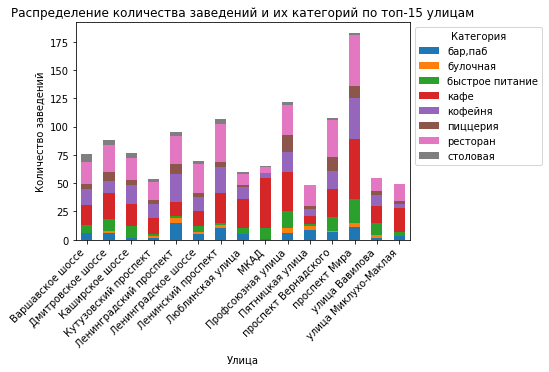

In [43]:
top_15_streets = places['street'].value_counts().nlargest(15)

top_15_places = places[places['street'].isin(top_15_streets.index)]

# Создаем сводную таблицу по улицам и категориям заведений
pivot_table_top_15 = pd.pivot_table(top_15_places, index='street', columns='category', values='name', aggfunc='count', fill_value=0)


plt.figure(figsize=(20, 20));
pivot_table_top_15.plot(kind='bar', stacked=True)
plt.xlabel('Улица')
plt.ylabel('Количество заведений')
plt.title('Распределение количества заведений и их категорий по топ-15 улицам')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Категория', bbox_to_anchor=(1, 1))

plt.show()

На различных улицах преобладают разные категории заведений. Например, на Варшавском шоссе и Дмитровском шоссе наибольшее количество заведений относится к категориям "ресторан" и "кафе", в то время как на Ленинградском проспекте и Профсоюзной улице чаще встречаются кофейни и кафе.

Некоторые улицы, такие как проспект Мира и Кутузовский проспект, предлагают разнообразие заведений различных категорий, включая кафе, рестораны, быстрое питание и другие.

МКАД отличается большим количеством заведений быстрого питания и кафе.

Улицы Пятницкая и Вавилова представлены преимущественно ресторанами и кафе.

<a id="explore_single_outlets"></a>

#### Исследуем улицы, на которых находится только один объект общепита



In [44]:
one_count = places['street'].value_counts()
streets_with_one_place = one_count[one_count == 1].index

print('Всего', len(streets_with_one_place), 'улиц с одним заведением')

Всего 458 улиц с одним заведением


Может показаться что 458 улиц где находится только 1 заведение это много, но во-первых в Москве более 4000 улиц, а во-вторых двайте посмотрим на карту

Даже если заведение одно на улицу, в нескольких метрах от него может проходить уже другая улица, поэтому все равно, заведения находятся близко друг к другу. Чем дальше от центра, тем меньше количество заведений

<a id="explore_median_prices"></a>

#### Посчитаем медиану средних чеков для каждого района

Центральный административный округ имеет наивысшую среднюю стоимость заказа, составляющую 1000 рублей. Это может быть обусловлено более высокими ценами в ресторанах и кафе, а также широким выбором эксклюзивных заведений в центре города.

Остальные округи (Восточный, Западный, Северный, Северо-Восточный, Северо-Западный, Юго-Восточный, Юго-Западный и Южный) имеют схожую среднюю стоимость заказа, составляющую примерно 500-525 рублей. Это может указывать на более доступные цены в заведениях этих районов.

<a id="data_analysis_summary"></a>

#### ВЫВОД

Анализ данных показал, что **наиболее популярными заведениями являются кафе, рестораны и кофейни**. **Рестораны, бары и пиццерии предоставляют больше посадочных мест**, чем кафе, но это может быть связано с неполными данными. **Большинство заведений в Москве не являются сетевыми**, <u>но среди сетевых заведений наиболее популярны пиццерии и кофейни</u>, такие как "Шоколадница", "Домино" и "Додо Пицца". **Количество заведений возрастает в центральном округе, где также выше рейтинг и средний чек заведений**. Кроме того, ближе к центру города у людей больше потребность в кафе и ресторанах, а при наличии парка – в кофейнях. Однако, дальше от центра можно найти больше кафе и заведений быстрого питания.

<a id="open_coffee_shop"></a>

### Детальный анализ кофеен

Перейдем к более детальному исследованию, связанному с открытием кофейни. Мы выясним, сколько всего кофеен в датасете и в каких районах их больше всего. Также узнаем, есть ли круглосуточные кофейни и какие у них рейтинги. Мы посмотрим на распределение рейтингов кофеен по районам и определимся с ценовым диапазоном для чашки капучино при открытии своего заведения.


<a id="explore_coffee_shops"></a>

#### Сколько всего кофеен в датасете? В каких районах их больше всего, каковы особенности их расположения?


In [47]:
total_coffees = len(places[places['category'] == 'кофейня'])

print("Всего кофеен в датасете:", total_coffees)

Всего кофеен в датасете: 1413


In [48]:
coffee_shops_by_district = places[places['category'] == 'кофейня'].groupby('district')['name'].count().sort_values()

most_coffee_shops_district = coffee_shops_by_district.idxmax()
most_coffee_shops_count = coffee_shops_by_district.max()

print("Больше всего кофеен в районе:", most_coffee_shops_district)
print("Количество кофеен:", most_coffee_shops_count)


Больше всего кофеен в районе: Центральный административный округ
Количество кофеен: 428


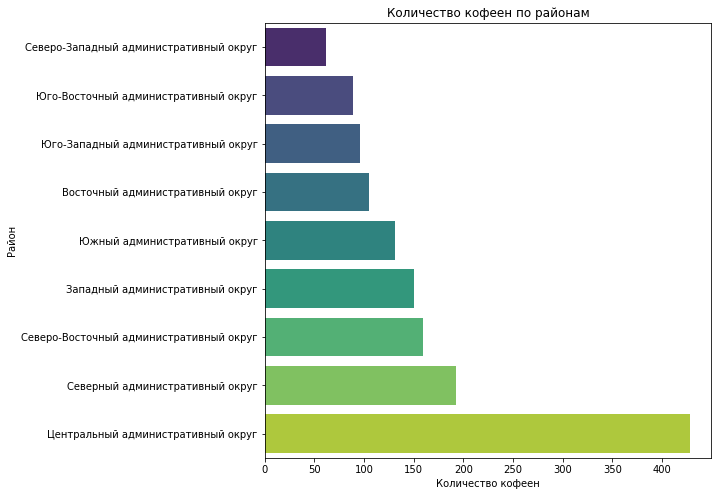

In [50]:
plt.figure(figsize=(8, 8))
sns.barplot(y=coffee_shops_by_district.index, x=coffee_shops_by_district.values, palette='viridis')
plt.xlabel('Количество кофеен')
plt.ylabel('Район')
plt.title('Количество кофеен по районам')
plt.show()

<a id="explore_coffee_prices"></a>

#### Распределение цен за чашку кофе по районам

<a id="explore_24_7_coffee"></a>

#### Есть ли круглосуточные кофейни?


In [52]:
# Создание переменной с кофейнями
coffee_shops = places[places['category'] == 'кофейня']

# Проверка наличия круглосуточных кофеен в переменной
round_the_clock_coffee_shops = coffee_shops[coffee_shops['is_24/7'] == True]

if len(round_the_clock_coffee_shops) > 0:
    print("Да, в датасете", len(round_the_clock_coffee_shops),"круглосуточных кофеен.")
else:
    print("Круглосуточных кофеен в датасете нет.")


Да, в датасете 59 круглосуточных кофеен.


In [53]:
round_the_clock_coffee_shops['name'].nunique()

22

22 наименования заведений, которые имеют 59 точек кофеен, работают круглосуточно!

**Обычно, кофейням нет смысла работать по ночам, единицы пойдут пить кофе ночью, поэтому выручки не будет**

<a id="explore_coffee_ratings"></a>

#### Какие у кофеен рейтинги? Как они распределяются по районам?


In [54]:
average_ratings_by_name = coffee_shops.groupby('name')['rating'].median()

print("Усредненные рейтинги кофеен:")
print(average_ratings_by_name)


Усредненные рейтинги кофеен:
name
18 грамм             4.4
2-й этаж             4.3
2046                 4.8
22 акра кофе&хлеб    4.4
42 coffee shop       4.4
                    ... 
это кофейня          4.4
этокофе              4.7
эшторил              4.2
я кофе               3.8
ялва                 4.5
Name: rating, Length: 826, dtype: float64


Лучше посмотрим на распределение рейтингов

In [55]:
coffee_shops['rating'].describe()

count    1413.000000
mean        4.277282
std         0.372250
min         1.400000
25%         4.100000
50%         4.300000
75%         4.400000
max         5.000000
Name: rating, dtype: float64

Интересно посмотреть каким кофейням чаще ставят 5.0 сетевым или несетевым.

In [56]:
# Кофейни с рейтингом 5 и сетевые
coffee_shops_with_rating_5_and_chain = coffee_shops[(coffee_shops['rating'] == 5.0) & (coffee_shops['chain'] == 1)]
# Кофейни с рейтингом 5 и несетевые
coffee_shops_with_rating_5_and_not_chain = coffee_shops[(coffee_shops['rating'] == 5.0) & (coffee_shops['chain'] == 0)]

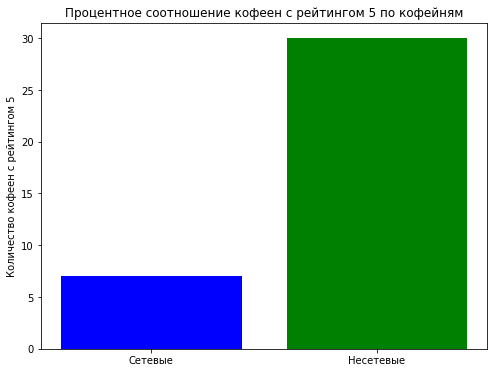

In [57]:
labels = ['Сетевые', 'Несетевые']
counts = [len(coffee_shops_with_rating_5_and_chain), len(coffee_shops_with_rating_5_and_not_chain)]

plt.figure(figsize=(8, 6))
plt.bar(labels, counts, color=['blue', 'green'])
plt.ylabel('Количество кофеен с рейтингом 5')
plt.title('Процентное соотношение кофеен с рейтингом 5 по кофейням')
plt.show()

Мы видим, что несетевые кофейни имеют рейтинг 5.0, это связано с тем, что несетевые кофейни, как правило, более индивидуальные и уникальные заведения, управляемые небольшими командами или одним владельцем

<a id="explore_coffee_prices"></a>

#### На какую стоимость чашки капучино стоит ориентироваться при открытии и почему?

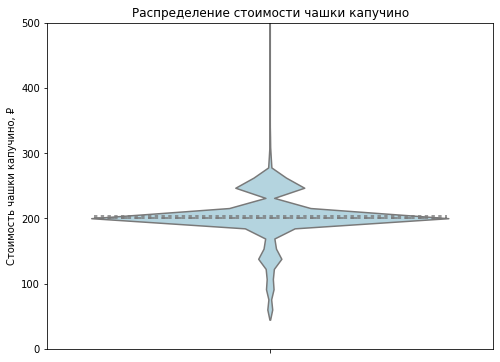

In [58]:
plt.figure(figsize=(8, 6))
sns.violinplot(data=places, y='middle_coffee_cup', color='lightblue', inner='quartile')
plt.ylabel('Стоимость чашки капучино, ₽')
plt.title('Распределение стоимости чашки капучино')
plt.ylim(0, 500)  # Устанавливаем ограничение по оси y
plt.show()


Медианная цена 200, а посмотрим на среднюю

In [59]:
average_coffee_price = places['middle_coffee_cup'].mean()
print(f"Средняя цена чашки капучино в столице: {average_coffee_price:.2f} ₽")

Средняя цена чашки капучино в столице: 201.67 ₽


Инвесторам, планирующим открыть кофейню, рекомендуется ориентироваться на цену чашки капучино, которая составляет около 200 рублей. 

<a id="summary_coffee"></a>
#### ВЫВОД по кофейням

**В датасете представлено 1413 кофеен, и большинство из них расположено в Центральном административном округе Москвы**. 
22 наименования заведений, которые имеют 59 точек кофеен, работают круглосуточно!

**Рейтинги** кофеен варьируются от 1.4 до 5.0, с **медианным значением 4.3**. Заведения с самыми высокими рейтингами распределены по различным районам Москвы. Каждый район имеет свою специфику и предпочтения в оценке заведений.

**Медианная цена чашки капучино составляет 200 рублей**. Это ориентировочная стоимость, на которую можно ориентироваться при открытии новой кофейни.

Также стоит отметить, **что несетевые кофейни имеют высокие рейтинги (5.0)**. Возможно, это связано с тем, что **несетевые кофейни обычно представляют собой более индивидуальные и уникальные заведения,** управляемые небольшими командами или одним владельцем, что создает особую атмосферу и привлекательность для посетителей.

<a id="potencial_coffee"></a>
#### Потенциальная кофейня

Учитывая все вышесказанное, могу предложить отличное место для открытия кофейни

Лучше всего открывать кофейню в месте с большим трафиком.
Если открыть карту Москвы с отмеченными кофейнями, то мы увидим что рядом с предполагаемым местом кофейни находятся:
- 2 крупных вуза МГИМО и МИРЭА, 
- метро Проспект Вернадского,
- Парк Олимпийской деревни,
- несколько жилых комплексов
и рядом практически нет конкурентов!

В Москве уже есть заведение которое имеет название "Central Perk" и создано как бы по образу сериала Друзья, но на самом деле, оно ничего общего не имеет с кофейней из сериала.
Инвесчторам было бы выгодно вложиться и создать прототип кофейни из сериала, тогда бы помимо студентов,туристов и жителей района, можно было бы ожидать фанатов сериала.

Анализируя данные, мы уже узнали что:
- Западный округ включает в себя престижные районы с развитой культурной и деловой жизнью
- Средней рейтинг по районам у Западного округа не самый низкий 
- Средняя стоимость чашки кофе достаточно высокая, от 203 рублей. 

<a id="the_end"></a>
### ВЫВОД ИССЛЕДОВАНИЯ

Анализ данных об общественном питании в Москве позволил нам получить ценную информацию о характеристиках заведений, их распределении по районам и типам, а также оценить популярность и предпочтения посетителей.

**Типы и характеристики заведений:**

- Кафе, рестораны и кофейни являются наиболее распространенными типами заведений.
- Рестораны, бары и пиццерии предоставляют больше посадочных мест по сравнению с кафе.
- Количество посадочных мест в кафе может быть неполностью представлено в данных.


- Большинство заведений в Москве являются несетевыми.
- Среди сетевых заведений наиболее популярными являются пиццерии и кофейни, такие как "Шоколадница", "Домино" и "Додо Пицца".

**Распределение заведений по районам:**

- Заведения чаще располагаются в центральных районах Москвы.
- Рейтинги и средние чеки заведений также выше в центральных районах.

**Распределение рейтингов и средних цен:**

- Рейтинги заведений варьируются от 1.4 до 5.0 с медианным значением 4.3.
- Медианная цена чашки капучино составляет 200 рублей.

**Кофейни:**

- В датасете представлено 1413 кофеен, преимущественно расположенных в Центральном административном округе.
- Отсутствуют круглосуточные кофейни в представленных данных.
- Несетевые кофейни имеют высокие рейтинги (5.0), что может быть связано с их уникальностью и индивидуальностью.

<a id="create_presentation"></a>
### Презентация

Собрав все данные и сделав необходимые анализы, мы подготовили презентацию для инвесторов.
Презентация краткая, большая часть сведений проговаривается автором исследования

Презентация: <https://disk.yandex.ru/i/Jrj0LAnz6ypmPA>